# Task 2: Modulate and demodulate  amplitude  shift  keying (FSK)  signal  from  a  random  binary sequence

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Input binary data sequence

In [2]:
b = np.random.randint(2, size = 20)
print(b)

[1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1]


## Set sample and carrier information

In [3]:
Tb = 0.001
f_carry_0 = 5000
f_carry_1 = 10000
n = b.shape[0]
t = Tb*n
Spb = 1000
x = np.arange(0, t, Tb/Spb)
c_0 = np.sin(2*np.pi*f_carry_0*x)
c_1 = np.sin(2*np.pi*f_carry_1*x)

## Modulation

### Plot the carrier signal

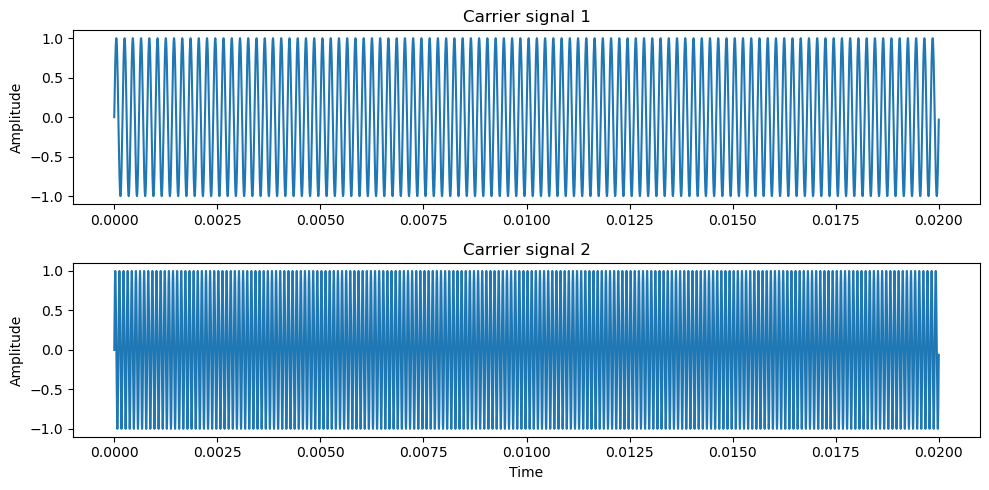

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharey = True, figsize = (10,5))
ax1.set_title('Carrier signal 1')
ax1.set_ylabel('Amplitude')
ax1.plot(x, c_0)
ax2.set_title('Carrier signal 2')
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Time')
ax2.plot(x, c_1)
fig.tight_layout()
plt.show()

### Plot the binary data sequence

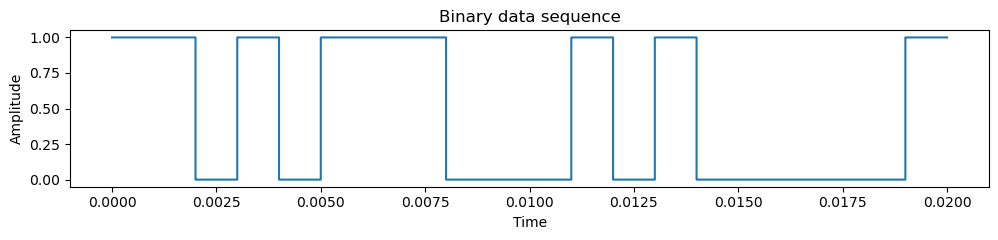

In [5]:
data = np.repeat(b, Spb)
plt.figure(figsize=(10, 2.5))
plt.title('Binary data sequence')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.step(x, data)
plt.tight_layout()
plt.show()

### Plot the FSK modulated signal

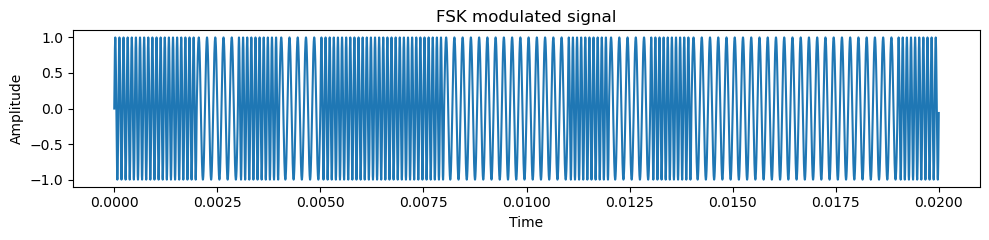

In [6]:
mod = np.where(data == 0, data + c_0, data*c_1)
plt.figure(figsize=(10, 2.5))
plt.title('FSK modulated signal')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.plot(x, mod)
plt.tight_layout()
plt.show()

## Demodulation

### Initialize demodulated sequence

In [7]:
demod = np.zeros(n).astype('int')

### Correlate and obtain demodulated binary data based on decision variables 

In [8]:
for i in range(0, n*Spb, Spb):
    I_0 = np.trapz(mod[i:i+Spb]*c_0[i:i+Spb])
    e_0 = np.sum(c_0[i:i+Spb]**2)
    I_1 = np.trapz(mod[i:i+Spb]*c_1[i:i+Spb])
    e_1 = np.sum(c_1[i:i+Spb]**2)
    if I_0 - 1/2*e_0 > I_1 - 1/2*e_1:
       demod[np.floor(i/Spb).astype('int')] = 0
    else:
       demod[np.floor(i/Spb).astype('int')] = 1

### Print out and plot demodulated binary sequence and input sequence for comparing

Demodulated sequence:	 [1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1]
Input sequence:		 [1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1]


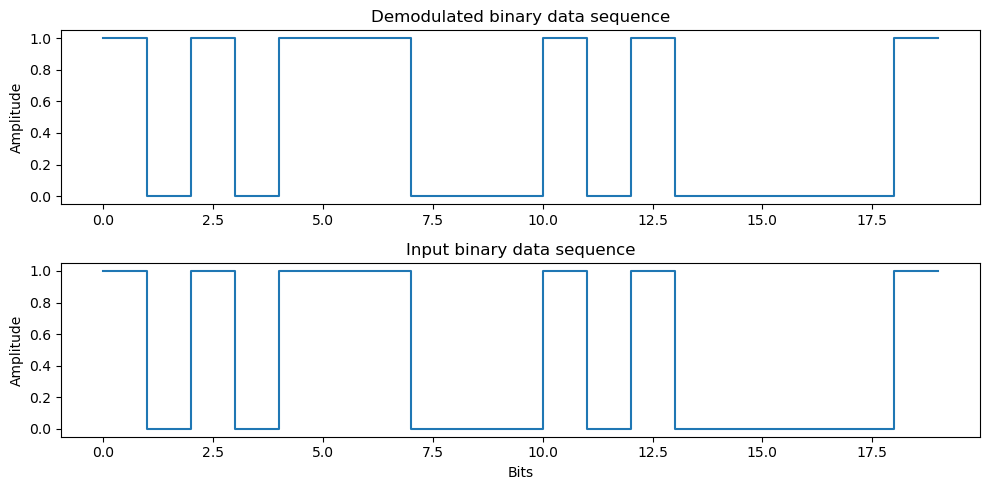

In [9]:
print('Demodulated sequence:\t', demod)
print('Input sequence:\t\t', b)
fig, (ax1, ax2) = plt.subplots(2, 1, sharey = True, figsize = (10,5))
ax1.set_title('Demodulated binary data sequence')
ax1.set_ylabel('Amplitude')
ax1.step(np.arange(n), demod)
ax2.set_title('Input binary data sequence')
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Bits')
ax2.step(np.arange(n), b)
fig.tight_layout()
plt.show()

## Add White Gaussian noise with zero mean

### Set mean and variance of AWGN and genarate noise

In [10]:
mu = 0
sigma = 1
noise = np.random.normal(mu, sigma, x.shape[0])

### Add noise to transmitted waveform and plot the effect of noise to the signal

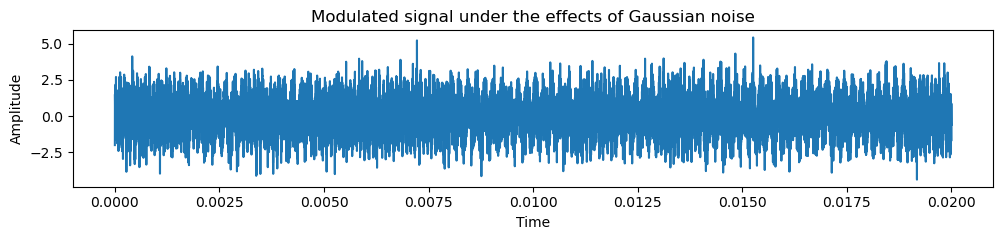

In [11]:
r_t = mod + noise
plt.figure(figsize=(10, 2.5))
plt.title('Modulated signal under the effects of Gaussian noise')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.plot(x, r_t)
plt.tight_layout()
plt.show()

### Demodulate using the same correlate method

Demodulated sequence:	 [1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1]
Input sequence:		 [1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1]


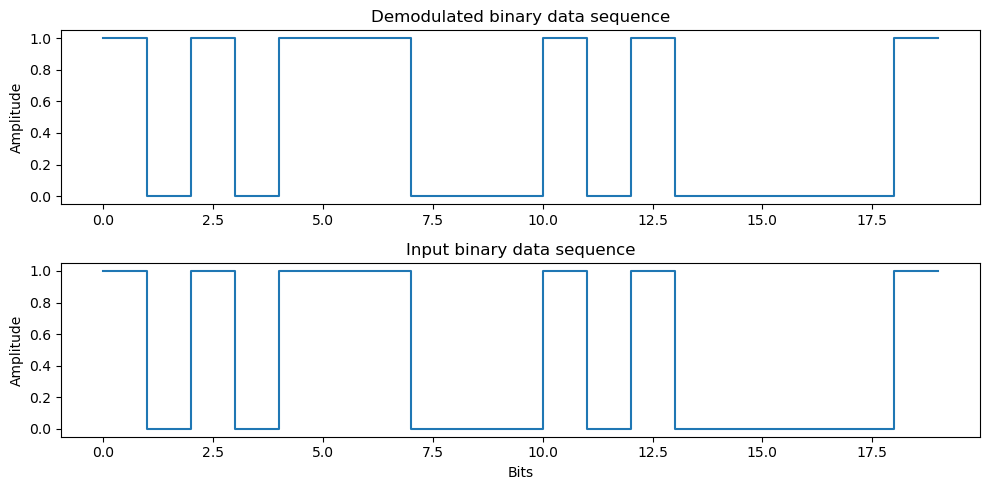

In [12]:
demod_new = np.zeros(n).astype('int')
for i in range(0, n*Spb, Spb):
    I_0 = np.trapz(r_t[i:i+Spb]*c_0[i:i+Spb])
    e_0 = np.sum(c_0[i:i+Spb]**2)
    I_1 = np.trapz(r_t[i:i+Spb]*c_1[i:i+Spb])
    e_1 = np.sum(c_1[i:i+Spb]**2)
    if I_0 - 1/2*e_0 > I_1 - 1/2*e_1:
       demod_new[np.floor(i/Spb).astype('int')] = 0
    else:
       demod_new[np.floor(i/Spb).astype('int')] = 1
print('Demodulated sequence:\t', demod_new)
print('Input sequence:\t\t', b)
fig, (ax1, ax2) = plt.subplots(2, 1, sharey = True, figsize = (10,5))
ax1.set_title('Demodulated binary data sequence')
ax1.set_ylabel('Amplitude')
ax1.step(np.arange(n), demod)
ax2.set_title('Input binary data sequence')
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Bits')
ax2.step(np.arange(n), b)
fig.tight_layout()
plt.show()

### Compute the error probability numerically

In [13]:
print(f'Error probability: {np.argwhere(demod_new != b).shape[0]/n*100}%')

Error probability: 0.0%
